In [3]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import genextreme
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.optimize import curve_fit, least_squares
import matplotlib as mpl
from fitter import Fitter
import scipy.stats as stats
from idf_curves import IDFAnalysis

import warnings
# Suprimir todas las advertencias
warnings.filterwarnings("ignore")

import logging

# Suppress INFO messages from fitter
logging.getLogger('fitter').setLevel(logging.WARNING)

In [4]:
historic_hourly = pd.read_csv('Rainfall.csv', index_col=0, parse_dates=True)

In [5]:
historic_hourly.index

DatetimeIndex(['1980-01-01 00:00:00', '1980-01-01 01:00:00',
               '1980-01-01 02:00:00', '1980-01-01 03:00:00',
               '1980-01-01 04:00:00', '1980-01-01 05:00:00',
               '1980-01-01 06:00:00', '1980-01-01 07:00:00',
               '1980-01-01 08:00:00', '1980-01-01 09:00:00',
               ...
               '2024-12-31 14:00:00', '2024-12-31 15:00:00',
               '2024-12-31 16:00:00', '2024-12-31 17:00:00',
               '2024-12-31 18:00:00', '2024-12-31 19:00:00',
               '2024-12-31 20:00:00', '2024-12-31 21:00:00',
               '2024-12-31 22:00:00', '2024-12-31 23:00:00'],
              dtype='datetime64[ns]', name='date', length=394488, freq=None)

# Intensity - duration - frecuency curves

In [30]:
# Define durations
Durations = np.array([1, 2, 3, 4, 5, 6, 9, 12, 15, 18, 21, 24])
# Define return periods
Return_periods = np.array([2, 5, 10, 20, 50, 100, 500])
# Define rainfall station
station = historic_hourly.columns[0]

In [31]:

idf_analysis = IDFAnalysis(historic_hourly, Durations, Return_periods, distribution='gumbel_r', model='scipy_stats', method='least_squares', IDF_type='IDF_typeV')

2024-08-06 12:14:26.243 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=0.821827)
2024-08-06 12:14:26.262 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=1.104185)
2024-08-06 12:14:26.282 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=1.139927)
2024-08-06 12:14:26.304 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=1.137616)
2024-08-06 12:14:26.323 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=2.090074)
2024-08-06 12:14:26.343 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=1.798289)
2024-08-06 12:14:26.361 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_r distribution with error=3.871943)
2024-08-06 12:14:26.382 | INFO     | fitter.fitter:_fit_single_distribution:

In [49]:
IDF_types = ['IDF_typeI', 'IDF_typeII', 'IDF_typeIII', 'IDF_typeIV', 'IDF_typeV']
results_goodness = pd.DataFrame(index = IDF_types, columns = ['R2', 'RMSE', 'MAE'])
for types in IDF_types:
    idf_analysis.calculate_goodness_of_fit(station, IDF_type=types).loc[['Global'],:]
    results_goodness.loc[types] = idf_analysis.calculate_goodness_of_fit(station, IDF_type=types).loc[['Global'],:].values

results_goodness.sort_values(by='R2', ascending=False)

,R2,RMSE,MAE
IDF_typeII,0.998686,0.291203,0.252221
IDF_typeIV,0.971415,1.358351,1.216091
IDF_typeV,0.95108,1.776981,1.610106
IDF_typeIII,0.672108,4.600518,2.048572
IDF_typeI,-0.625072,10.241824,9.02538


In [46]:
idf_analysis.calculate_goodness_of_fit(station, IDF_type='IDF_typeII').loc[['Global'],:]

,R2,RMSE,MAE
Return_Period,,,
Global,0.998686,0.291203,0.252221


In [40]:
# Generate CDF plot for a specific station
cdf_fig = idf_analysis.plot_cdf_models(station)
cdf_fig.savefig(f'cdf_plot_{station}.png', dpi=300, bbox_inches='tight')
plt.close(cdf_fig)

In [41]:
# Generate Q-Q plot for a specific station
qq_fig = idf_analysis.plot_qq_models(station)
qq_fig.savefig(f'qq_plot_{station}.png', dpi=300, bbox_inches='tight')
plt.close(qq_fig)

In [43]:
# Get the IDF table for a specific station
station_idf = idf_analysis.get_idf_table(station)
station_idf

,1,2,3,4,5,6,9,12,15,18,21,24
Tr,,,,,,,,,,,,
2,16.764755,13.776510,11.461299,9.718390,8.442154,7.418323,5.429455,4.421822,3.750468,3.355350,3.001483,2.759821
5,20.718074,17.391487,14.671541,12.467590,10.961891,9.671357,7.023216,5.649698,4.717263,4.215285,3.789891,3.482229
10,23.335516,19.784916,16.797000,14.287799,12.630176,11.163061,8.078424,6.462659,5.357366,4.784638,4.311887,3.960527
20,25.846228,22.080750,18.835792,16.033788,14.230435,12.593940,9.090606,7.242470,5.971368,5.330774,4.812597,4.419322
50,29.096088,25.052472,21.474799,18.293791,16.301807,14.446065,10.400771,8.251856,6.766131,6.037692,5.460715,5.013184
100,31.531401,27.279360,23.452363,19.987345,17.854008,15.833972,11.382555,9.008249,7.361693,6.567427,5.946388,5.458200
500,37.159037,32.425357,28.022212,23.900891,21.440908,19.041214,13.651308,10.756157,8.737948,7.791564,7.068705,6.486565


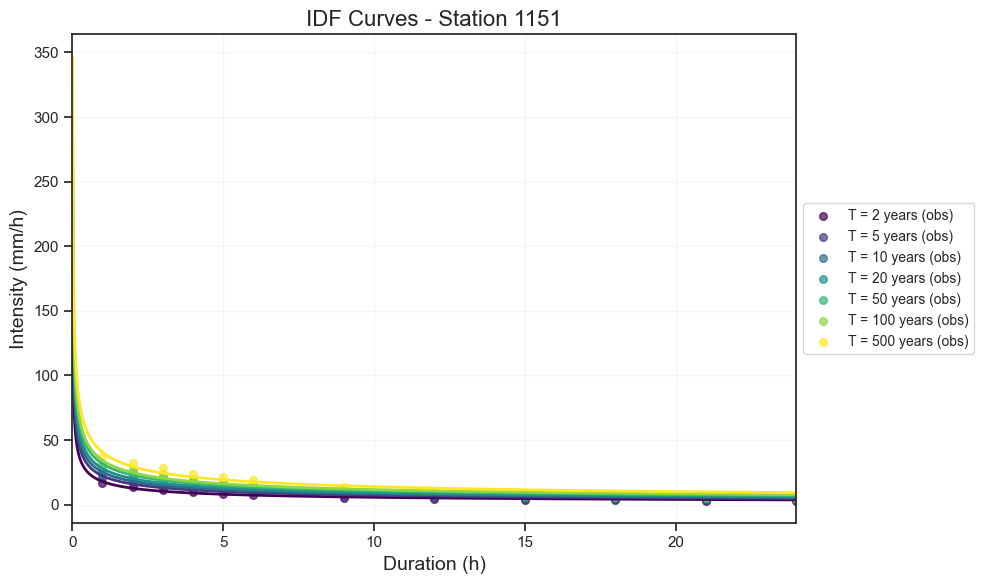

In [42]:
synth_IDF, idf_fig = idf_analysis.IDF_fit(station, plot=True)

In [ ]:
# Generate CDF plot for a specific station
# station = historic_hourly.columns[1]
# cdf_fig = idf_analysis.plot_cdf_models(station)
# cdf_fig.savefig(f'cdf_plot_{station}.png', dpi=300, bbox_inches='tight')
# plt.close(cdf_fig)

# Create IDF table for a specific station
station_idf = idf_analysis.get_idf_table(station)

# Generate Q-Q plot for a specific station
# qq_fig = idf_analysis.plot_qq_models(station)
# qq_fig.savefig(f'qq_plot_{station}.png', dpi=300, bbox_inches='tight')
# plt.close(qq_fig)

# Fit and plot IDF fit curves for a specific station
synth_IDF, idf_fig = idf_analysis.Fit_IDF(station, plot=True)
# idf_fig.savefig(f'idf_curves_{station}.png', dpi=300, bbox_inches='tight')
# plt.close(idf_fig)